In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt

## Merge Dataframes

In [4]:
# global land temperature data by city, with latitude/longitude values
filename = 'Global-Land-Temperatures-By-City.csv'
temp_df = pd.read_csv(filename, parse_dates = True, index_col = 'dt')
temp_df.tail()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E
2013-09-01,NaN,NaN,Zwolle,Netherlands,52.24N,5.26E


In [5]:
# federal emergency data, join on county
filename1 = 'federal_emergencies.csv'
disaster_df = pd.read_csv(filename1)
disaster_df.head()

,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program
0,DR-1,Disaster,05/02/1953,GA,NaN,Tornado,Tornado,05/02/1953,05/02/1953,06/01/1954,Yes,No,Yes,Yes
1,DR-2,Disaster,05/15/1953,TX,NaN,Tornado,Tornado and Heavy Rainfall,05/15/1953,05/15/1953,01/01/1958,Yes,No,Yes,Yes
2,DR-3,Disaster,05/29/1953,LA,NaN,Flood,Flood,05/29/1953,05/29/1953,02/01/1960,Yes,No,Yes,Yes
3,DR-4,Disaster,06/02/1953,MI,NaN,Tornado,Tornado,06/02/1953,06/02/1953,02/01/1956,Yes,No,Yes,Yes
4,DR-5,Disaster,06/06/1953,MT,NaN,Flood,Floods,06/06/1953,06/06/1953,12/01/1955,Yes,No,Yes,Yes


In [60]:
# data of latitude/longitude and county to merge two dataframes
filename2 = 'zip_codes_states.csv'
us_join = pd.read_csv(filename2)
us_join.head()

,zip_code,latitude,longitude,city,state,county
0,501,40.922326,-72.637078,Holtsville,NY,Suffolk
1,544,40.922326,-72.637078,Holtsville,NY,Suffolk
2,601,18.165273,-66.722583,Adjuntas,PR,Adjuntas
3,602,18.393103,-67.180953,Aguada,PR,Aguada
4,603,18.455913,-67.145780,Aguadilla,PR,Aguadilla


In [40]:
# temp_df: drop all countries except US, remove direction (NESW) from lat/long
temp_us = temp_df[temp_df['Country'] == 'United States']
temp_us['Latitude'] = temp_us['Latitude'].str[:-1]
temp_us['Longitude'] = temp_us['Longitude'].str[:-1]
temp_us.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1820-01-01,2.101,3.217,Abilene,United States,32.95,100.53
1820-02-01,6.926,2.853,Abilene,United States,32.95,100.53
1820-03-01,10.767,2.395,Abilene,United States,32.95,100.53
1820-04-01,17.989,2.202,Abilene,United States,32.95,100.53
1820-05-01,21.809,2.036,Abilene,United States,32.95,100.53


In [64]:
# round latitude and longitude values to two decimal points in the temp_df
us_join['latitude'] = us_join['latitude'].round(decimals=2)
us_join['longitude'] = us_join['longitude'].round(decimals=2)
us_join.head()

,zip_code,latitude,longitude,city,state,county
0,501,40.92,-72.64,Holtsville,NY,Suffolk
1,544,40.92,-72.64,Holtsville,NY,Suffolk
2,601,18.17,-66.72,Adjuntas,PR,Adjuntas
3,602,18.39,-67.18,Aguada,PR,Aguada
4,603,18.46,-67.15,Aguadilla,PR,Aguadilla


In [70]:
# tried to join, us_join values do not appear
outer_join = temp_us.set_index('Latitude').join(us_join.set_index('latitude'))
outer_join


,AverageTemperature,AverageTemperatureUncertainty,City,Country,Longitude,zip_code,longitude,city,state,county
26.52,16.028,2.767,Brownsville,United States,96.72,NaN,NaN,NaN,NaN,NaN
26.52,15.151,3.087,Brownsville,United States,96.72,NaN,NaN,NaN,NaN,NaN
26.52,19.026,2.422,Brownsville,United States,96.72,NaN,NaN,NaN,NaN,NaN
26.52,20.997,2.728,Brownsville,United States,96.72,NaN,NaN,NaN,NaN,NaN
26.52,23.965,1.819,Brownsville,United States,96.72,NaN,NaN,NaN,NaN,NaN
26.52,26.946,1.928,Brownsville,United States,96.72,NaN,NaN,NaN,NaN,NaN
26.52,27.776,1.456,Brownsville,United States,96.72,NaN,NaN,NaN,NaN,NaN
26.52,27.240,1.565,Brownsville,United States,96.72,NaN,NaN,NaN,NaN,NaN
26.52,25.399,1.839,Brownsville,United States,96.72,NaN,NaN,NaN,NaN,NaN
26.52,23.437,1.890,Brownsville,United States,96.72,NaN,NaN,NaN,NaN,NaN


## Global Land Temperature Data

In [2]:
filename = 'Global-Land-Temperatures-By-City.csv'
temp_df = pd.read_csv(filename, parse_dates = True, index_col = 'dt')
temp_df.tail()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
2013-05-01,11.464,0.236,Zwolle,Netherlands,52.24N,5.26E
2013-06-01,15.043,0.261,Zwolle,Netherlands,52.24N,5.26E
2013-07-01,18.775,0.193,Zwolle,Netherlands,52.24N,5.26E
2013-08-01,18.025,0.298,Zwolle,Netherlands,52.24N,5.26E
2013-09-01,NaN,NaN,Zwolle,Netherlands,52.24N,5.26E


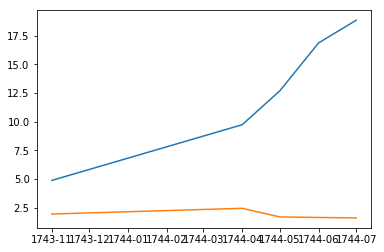

In [3]:
# Average temperature in all cities over time
all_temp = temp_df.sort_index()
all_temp1 = all_temp.groupby(['dt']).mean().dropna().head()
plt.plot(all_temp1)

In [4]:
# USA temperature vs time
usa_temp = temp_df[temp_df['Country'] == 'United States']
usa_temp1 = usa_temp.sort_index().groupby('dt').mean().dropna().head()

Text(0.5,1,'Average Temperature in the US over time')

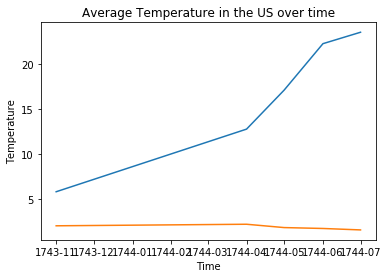

In [5]:
# plot of USA average temperature over time
plt.plot(usa_temp1)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Average Temperature in the US over time')

In [6]:
usa_temp.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W
1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W
1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W
1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W
1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W


In [7]:
# import state and capital data
filename = 'us-state-capitals.csv'
capitals = pd.read_csv(filename)
capitals.head()

,name,description,latitude,longitude
0,Alabama,Montgomery,32.377716,-86.300568
1,Alaska,Juneau,58.301598,-134.420212
2,Arizona,Phoenix,33.448143,-112.096962
3,Arkansas,Little Rock,34.746613,-92.288986
4,California,Sacramento,38.576668,-121.493629


In [8]:
capitals_list = capitals['description'].tolist()
capitals_only = usa_temp[usa_temp['City'].isin(capitals_list)]
capitals_only.City.unique()

array(['Austin', 'Baton Rouge', 'Boston', 'Charleston', 'Columbia',
       'Columbus', 'Concord', 'Denver', 'Des Moines', 'Indianapolis',
       'Jackson', 'Lansing', 'Lincoln', 'Little Rock', 'Madison',
       'Montgomery', 'Nashville', 'Oklahoma City', 'Phoenix',
       'Providence', 'Raleigh', 'Richmond', 'Sacramento', 'Salem',
       'Salt Lake City', 'Springfield', 'Tallahassee', 'Topeka'],
      dtype=object)

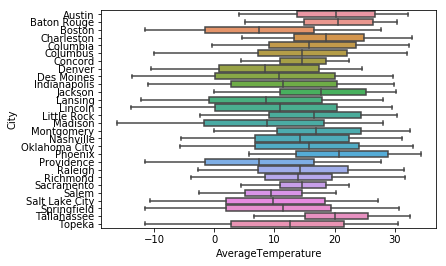

In [9]:
# Boxplot of the average temperature in the United States capitals
sns.boxplot(x='AverageTemperature', y='City', data=capitals_only)

In [10]:
# import US region and division data
filename = 'us-regions-and-divisions.csv'
regions = pd.read_csv(filename)
regions.head()

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


In [11]:
capitals.head()

,name,description,latitude,longitude
0,Alabama,Montgomery,32.377716,-86.300568
1,Alaska,Juneau,58.301598,-134.420212
2,Arizona,Phoenix,33.448143,-112.096962
3,Arkansas,Little Rock,34.746613,-92.288986
4,California,Sacramento,38.576668,-121.493629


In [12]:
state_cap_df = regions.set_index('State').join(capitals.set_index('name'))
state_cap_df.reset_index().head()

,State,State Code,Region,Division,description,latitude,longitude
0,Alaska,AK,West,Pacific,Juneau,58.301598,-134.420212
1,Alabama,AL,South,East South Central,Montgomery,32.377716,-86.300568
2,Arkansas,AR,South,West South Central,Little Rock,34.746613,-92.288986
3,Arizona,AZ,West,Mountain,Phoenix,33.448143,-112.096962
4,California,CA,West,Pacific,Sacramento,38.576668,-121.493629


In [13]:
capitals_only.reset_index().head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1820-01-01,7.169,3.676,Austin,United States,29.74N,97.85W
1,1820-02-01,11.448,2.964,Austin,United States,29.74N,97.85W
2,1820-03-01,15.003,2.413,Austin,United States,29.74N,97.85W
3,1820-04-01,21.022,2.136,Austin,United States,29.74N,97.85W
4,1820-05-01,23.938,1.923,Austin,United States,29.74N,97.85W


In [14]:
region_df = state_cap_df.set_index('description').join(capitals_only.set_index('City'))
region_df1 = region_df.reset_index().dropna().groupby('Division').mean()
region_df1

,latitude,longitude,AverageTemperature,AverageTemperatureUncertainty
Division,,,,
East North Central,40.622802,-86.859850,10.952970,1.338663
East South Central,33.649737,-87.692855,16.329759,1.294481
Mountain,38.067538,-109.543706,13.170119,0.860867
New England,42.362236,-71.311206,9.051683,1.206089
Pacific,41.914353,-122.299890,11.997772,0.729657
South Atlantic,35.487296,-80.237699,16.307039,1.297649
West North Central,40.558642,-95.273435,10.523444,1.249007
West South Central,32.843722,-94.503723,17.896736,0.974950


Text(0,0.5,'Average Temperature')

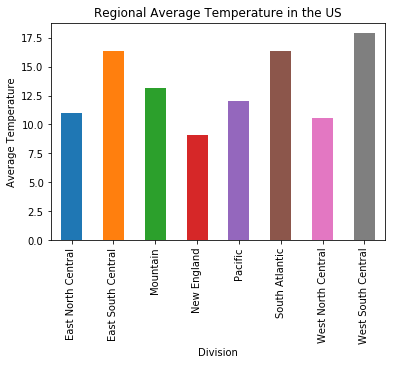

In [25]:
region_df1.plot.bar(y='AverageTemperature', title='Regional Average Temperature in the US', legend=False)
plt.ylabel('Average Temperature')

,AverageTemperature,AverageTemperatureUncertainty,Country,Latitude,Longitude,State Code,Region,Division,latitude,longitude
Austin,7.169,3.676,United States,29.74N,97.85W,TX,South,West South Central,30.274670,-97.740349
Austin,11.448,2.964,United States,29.74N,97.85W,TX,South,West South Central,30.274670,-97.740349
Austin,15.003,2.413,United States,29.74N,97.85W,TX,South,West South Central,30.274670,-97.740349
Austin,21.022,2.136,United States,29.74N,97.85W,TX,South,West South Central,30.274670,-97.740349
Austin,23.938,1.923,United States,29.74N,97.85W,TX,South,West South Central,30.274670,-97.740349
Austin,26.838,1.851,United States,29.74N,97.85W,TX,South,West South Central,30.274670,-97.740349
Austin,27.394,1.791,United States,29.74N,97.85W,TX,South,West South Central,30.274670,-97.740349
Austin,26.601,1.799,United States,29.74N,97.85W,TX,South,West South Central,30.274670,-97.740349
Austin,24.914,2.078,United States,29.74N,97.85W,TX,South,West South Central,30.274670,-97.740349
Austin,19.180,2.103,United States,29.74N,97.85W,TX,South,West South Central,30.274670,-97.740349


## Federal Emergency Data

In [3]:
filename1 = 'federal_emergencies.csv'
disaster_df = pd.read_csv(filename1)
disaster_df.head()

,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program
0,DR-1,Disaster,05/02/1953,GA,NaN,Tornado,Tornado,05/02/1953,05/02/1953,06/01/1954,Yes,No,Yes,Yes
1,DR-2,Disaster,05/15/1953,TX,NaN,Tornado,Tornado and Heavy Rainfall,05/15/1953,05/15/1953,01/01/1958,Yes,No,Yes,Yes
2,DR-3,Disaster,05/29/1953,LA,NaN,Flood,Flood,05/29/1953,05/29/1953,02/01/1960,Yes,No,Yes,Yes
3,DR-4,Disaster,06/02/1953,MI,NaN,Tornado,Tornado,06/02/1953,06/02/1953,02/01/1956,Yes,No,Yes,Yes
4,DR-5,Disaster,06/06/1953,MT,NaN,Flood,Floods,06/06/1953,06/06/1953,12/01/1955,Yes,No,Yes,Yes


In [6]:
disaster_df.groupby('County').count()

,Declaration Number,Declaration Type,Declaration Date,State,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program
County,,,,,,,,,,,,,
Abbeville County,8,8,8,8,8,8,8,8,5,8,8,8,8
Acadia Parish,22,22,22,22,22,22,22,22,14,22,22,22,22
Accomack County,16,16,16,16,16,16,16,16,14,16,16,16,16
Ada County,3,3,3,3,3,3,3,3,3,3,3,3,3
Adair County,70,70,70,70,70,70,70,70,54,70,70,70,70
Adams County,148,148,148,148,148,148,148,148,119,148,148,148,148
Addison County,19,19,19,19,19,19,19,19,14,19,19,19,19
Adjuntas Municipio,20,20,20,20,20,20,20,20,15,20,20,20,20
Aguada Municipio,9,9,9,9,9,9,9,9,6,9,9,9,9


In [27]:
disaster_type = disaster_df['Disaster Type']
disaster_type.value_counts()

Storm              16250
Flood               9317
Hurricane           8764
Snow                3565
Fire                2647
Ice                 1970
Tornado             1412
Drought             1292
Winter               301
Other                297
Typhoon              119
Earthquake           105
Volcano               50
Water                 42
Chemical              18
Mud/Landslide         10
Tsunami                9
Human Cause            6
Dam/Levee Break        6
Terrorism              5
Name: Disaster Type, dtype: int64

In [28]:
# extracting the declaration date and disaster type
df1 = disaster_df.loc[:,['Declaration Date','Disaster Type']]

In [29]:
# individual df for each disaster type to construct plots to show each disaster over time
storm = df1.loc[df1['Disaster Type'] == "Storm"]
flood = df1.loc[df1['Disaster Type'] == "Flood"]
hurricane = df1.loc[df1['Disaster Type'] == "Hurricane"]
snow = df1.loc[df1['Disaster Type'] == "Snow"]
fire = df1.loc[df1['Disaster Type'] == "Fire"]
ice = df1.loc[df1['Disaster Type'] == "Ice"]
tornado = df1.loc[df1['Disaster Type'] == "Tornado"]
drought = df1.loc[df1['Disaster Type'] == "Drought"]
winter = df1.loc[df1['Disaster Type'] == "Winter"]
other = df1.loc[df1['Disaster Type'] != ("Storm","Flood","Hurricane","Snow","Fire","Ice","Tornado","Drought","Winter")]


Text(0.5,1,'Storm Occurrences Over Time')

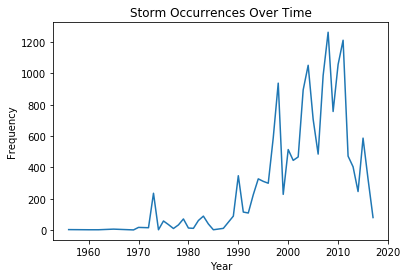

In [30]:
# Storm Data
storm1 = pd.to_datetime(storm['Declaration Date']).dt.year.value_counts().sort_index()
# plot of storm occurences
plt.plot(storm1)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Storm Occurrences Over Time')

Text(0.5,1,'Flood Occurrences Over Time')

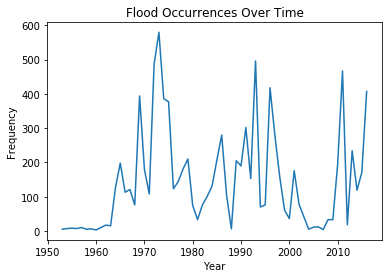

In [31]:
# Flood Data
flood1 = pd.to_datetime(flood['Declaration Date']).dt.year.value_counts().sort_index()
# plot of storm occurences
plt.plot(flood1)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Flood Occurrences Over Time')

Text(0.5,1,'Hurricane Occurrences Over Time')

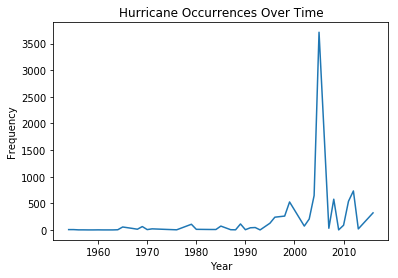

In [32]:
# Hurricane Data
hurricane1 = pd.to_datetime(hurricane['Declaration Date']).dt.year.value_counts().sort_index()
# plot of hurricane occurences
plt.plot(hurricane1)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Hurricane Occurrences Over Time')

Text(0.5,1,'Snow Occurrences Over Time')

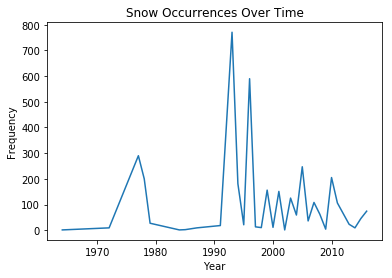

In [33]:
# Snow Data
snow1 = pd.to_datetime(snow['Declaration Date']).dt.year.value_counts().sort_index()
# plot of snow occurences
plt.plot(snow1)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Snow Occurrences Over Time')

Text(0.5,1,'Fire Occurrences Over Time')

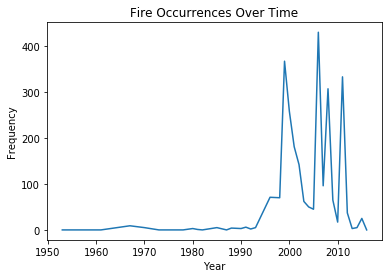

In [34]:
# Fire Data
fire1 = pd.to_datetime(fire['Declaration Date']).dt.year.value_counts().sort_index()
# plot of fire occurences
plt.plot(fire1)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Fire Occurrences Over Time')

Text(0.5,1,'Ice Occurrences Over Time')

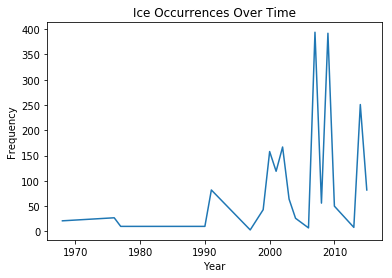

In [35]:
# Ice Data
ice1 = pd.to_datetime(ice['Declaration Date']).dt.year.value_counts().sort_index()
# plot of ice occurences
plt.plot(ice1)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Ice Occurrences Over Time')

Text(0.5,1,'Tornado Occurrences Over Time')

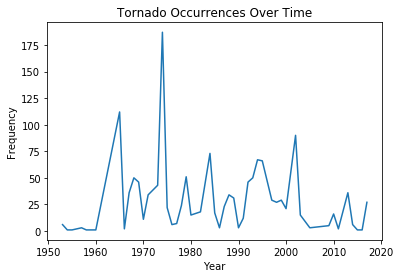

In [36]:
# Tornado Data
tornado1 = pd.to_datetime(tornado['Declaration Date']).dt.year.value_counts().sort_index()
# plot of tornado occurences
plt.plot(tornado1)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Tornado Occurrences Over Time')

Text(0.5,1,'Drought Occurrences Over Time')

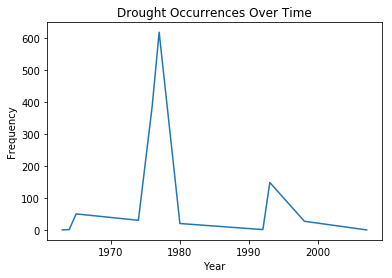

In [37]:
# Drought Data
drought1 = pd.to_datetime(drought['Declaration Date']).dt.year.value_counts().sort_index()
# plot of drought occurences
plt.plot(drought1)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Drought Occurrences Over Time')

Text(0.5,1,'Winter Occurrences Over Time')

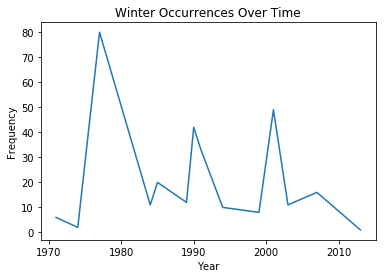

In [38]:
# Winter Data
winter1 = pd.to_datetime(winter['Declaration Date']).dt.year.value_counts().sort_index()
# plot of winter occurences
plt.plot(winter1)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Winter Occurrences Over Time')

Text(0.5,1,'Other Occurrences Over Time')

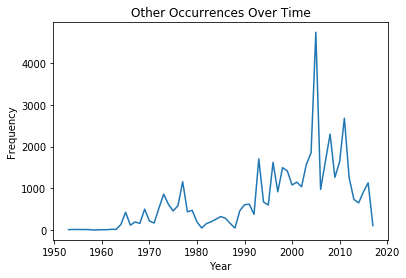

In [39]:
# Other Data
other1 = pd.to_datetime(other['Declaration Date']).dt.year.value_counts().sort_index()
# plot of other occurences
plt.plot(other1)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Other Occurrences Over Time')

In [40]:
#misc

In [41]:
ca_df = disaster_df[disaster_df['State'] == 'CA']

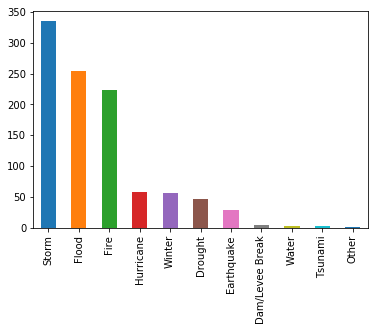

In [42]:
ca_df['Disaster Type'].value_counts().plot(kind='bar')

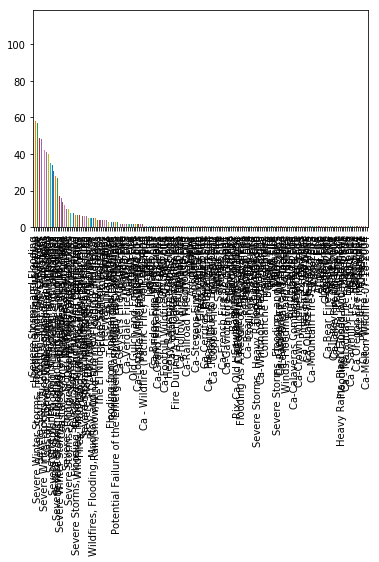

In [43]:
ca_df['Disaster Title'].value_counts().plot(kind='bar')

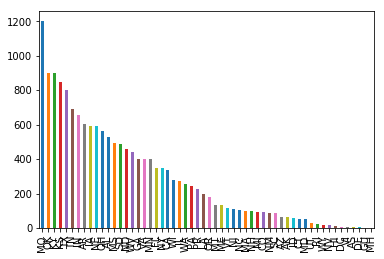

In [44]:
storm_df = disaster_df[disaster_df['Disaster Type'] == "Storm"]
storm_df['State'].value_counts().plot(kind='bar')

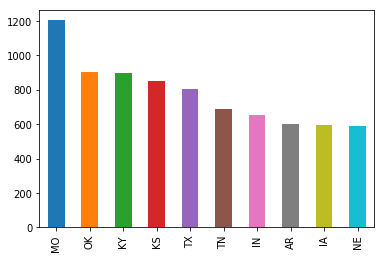

In [45]:
storm_df['State'].value_counts().head(10).plot(kind='bar')

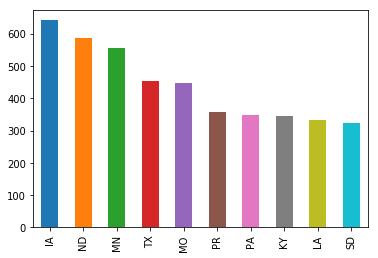

In [46]:
flood_df = disaster_df[disaster_df['Disaster Type'] == "Flood"]
flood_df['State'].value_counts().head(10).plot(kind='bar')